# **Feature Selection Techniques**

In [ ]:
# Import Library.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Load Dataset.
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None,
)

data.columns = [
    "Class Label",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alkalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanidins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]

data.head()

,Class Label,Alcohol,Malic Acid,Ash,Alkalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanidins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Imputation using Mean Values.
data = data.fillna(data.mean())

# Split Dataset into Independent and Dependent Features.
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# **⚛ Feature Selection with Correlation.** 

**Correlation is a measure of the linear relationship of two or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good quality features are highly correlated with the target. Furthermore, independent features should be correlated with the target but should be uncorrelated among themselves.**

*If two features are correlated, we can predict one from the other. Therefore, if two independent features are correlated among themselves, the model only needs one of them, as the second feature does not add additional information. Hence, use the **Pearson Correlation** here.*

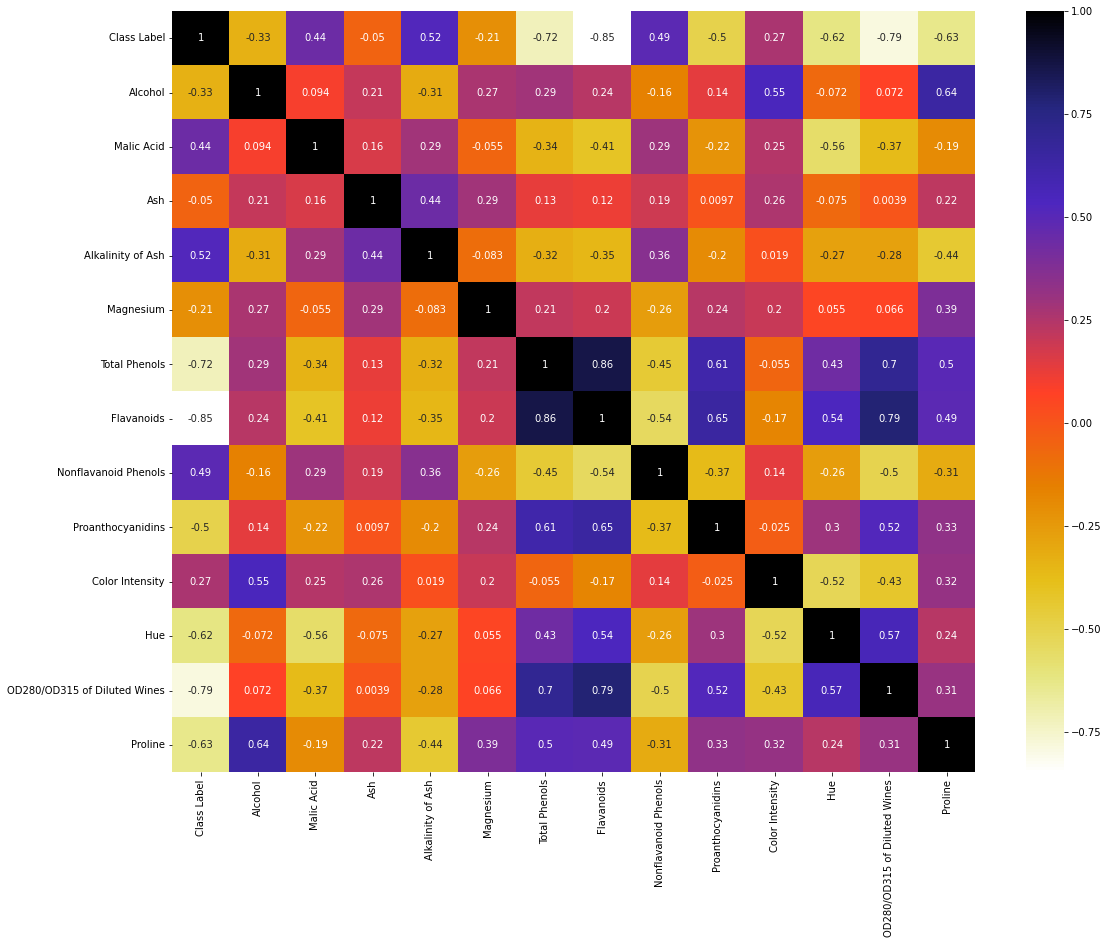

In [ ]:
# Using Pearson Correlation.
plt.figure(figsize=(18, 14))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# The following function can select highly correlated features and will remove the first feature that is correlated with other features.
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns.
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Extract Column Names.
                col_corr.add(colname)
    return col_corr

In [ ]:
# List of Correlated Features.
corr_features = correlation(data, 0.5)
print(corr_features)

{'Alkalinity of Ash', 'Proanthocyanidins', 'Nonflavanoid Phenols', 'Flavanoids', 'Hue', 'Total Phenols', 'Color Intensity', 'Proline', 'OD280/OD315 of Diluted Wines'}


In [ ]:
# Drop Correlated Features.
corr_df = data.drop(corr_features, axis=1)

corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class Label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic Acid   178 non-null    float64
 3   Ash          178 non-null    float64
 4   Magnesium    178 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 7.1 KB


# **⚛ Applying Variance Threshold.**

***Variance Threshold Feature Selector removes all low-variance features. This feature selection algorithm looks only at the features ($X$), not the desired output ($y$), and can thus be used for unsupervised learning.***

**Parameters:-** *threshold : float, default=0*

Features with a training-set variance lower than this threshold will be removed. The default is to keep all features with non-zero variance, i.e., remove the features that have the same value in all samples.

> [**sklearn.feature_selection.VarianceThreshold**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = VarianceThreshold(threshold=0.5)
var_threshold.fit(data)

var_threshold.get_support()

array([ True,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False,  True,  True])

In [ ]:
# Total Feature Selection.
print(sum(var_threshold.get_support()))

9


In [ ]:
# Count of Rejected Features.
constant_columns = [
    column
    for column in data.columns
    if column not in data.columns[var_threshold.get_support()]
]

# List of Rejected Features.
print(constant_columns)

['Ash', 'Total Phenols', 'Nonflavanoid Phenols', 'Proanthocyanidins', 'Hue']


In [ ]:
# Drop Selected Features below threshold value.
var_thres_df = data.drop(constant_columns, axis=1)

var_thres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class Label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Alkalinity of Ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Flavanoids                    178 non-null    float64
 6   Color Intensity               178 non-null    float64
 7   OD280/OD315 of Diluted Wines  178 non-null    float64
 8   Proline                       178 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 12.6 KB


# **⚛ Embedded Methods.**

These methods encompass the benefits of both the wrapper and filter methods by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.

### **LASSO ($L^{1} $) based Feature Selection.**

> [**Feature Selection using SelectFromModel**](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

clf = LogisticRegression(C=1, penalty="l1", solver="liblinear", random_state=42).fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(178, 11)

### **Tree-based Feature Selection.**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50, random_state=42).fit(X, y)
# clf = RandomForestClassifier(n_estimators=50, random_state=42).fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(178, 6)

# **⚛ Filter Methods.**

1.   **Forward Selection:** Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

2.   **Backward Elimination:** In backward elimination, we start with all the features and remove the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed in the removal of features.

3.   **Recursive Feature Elimination:** It is a greedy optimization algorithm that aims to find the best-performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

![filter.jpg](https://analyticsindiamag.com/wp-content/uploads/2019/04/filte.jpg)

### **Feature Importance using Random Forest.**

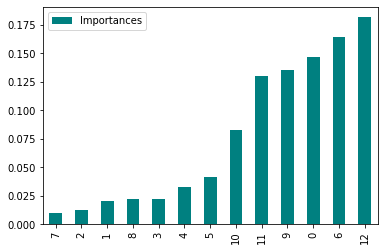

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier with different hyperparameters and fit the model.
clf = RandomForestClassifier(random_state=1).fit(X, y)

# Find the importance score of all the features.
importances = clf.feature_importances_

# Create Dataframe for Visualization.
final_df = pd.DataFrame(
    {"Features": pd.DataFrame(X).columns, "Importances": importances}
)
final_df.set_index("Importances")

# Sort in Ascending Order.
final_df = final_df.sort_values("Importances")

# Plot the Feature Importance in Bar Graphs.
final_df.plot.bar(color="teal")

### **Feature Ranking with Recursive Feature Elimination.**

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

> [**sklearn.feature_selection.RFE**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1).fit(X, y)
print(selector.support_)
print(selector.ranking_)

[ True False  True False False False  True  True False False False  True
 False]
[1 4 1 5 8 3 1 1 6 2 7 1 9]


# **⚛ Mutual Information for Classification.**

*   Estimate mutual information for a discrete target variable.

***Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.***

***The function relies on nonparametric methods based on entropy estimation from $k$-nearest neighbors distances. It can also be used for univariate feature selection.***

> [**sklearn.feature_selection.mutual_info_classif**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Determine the mutual information.
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.47436381, 0.27437718, 0.06133282, 0.26295905, 0.15971087,
       0.42907291, 0.65858758, 0.08933126, 0.27657599, 0.55894702,
       0.44467922, 0.50210397, 0.5610904 ])

In [ ]:
# Sort the features based on Importance.
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Flavanoids                      0.658588
Proline                         0.561090
Color Intensity                 0.558947
OD280/OD315 of Diluted Wines    0.502104
Alcohol                         0.474364
Hue                             0.444679
Total Phenols                   0.429073
Proanthocyanidins               0.276576
Malic Acid                      0.274377
Alkalinity of Ash               0.262959
Magnesium                       0.159711
Nonflavanoid Phenols            0.089331
Ash                             0.061333
dtype: float64

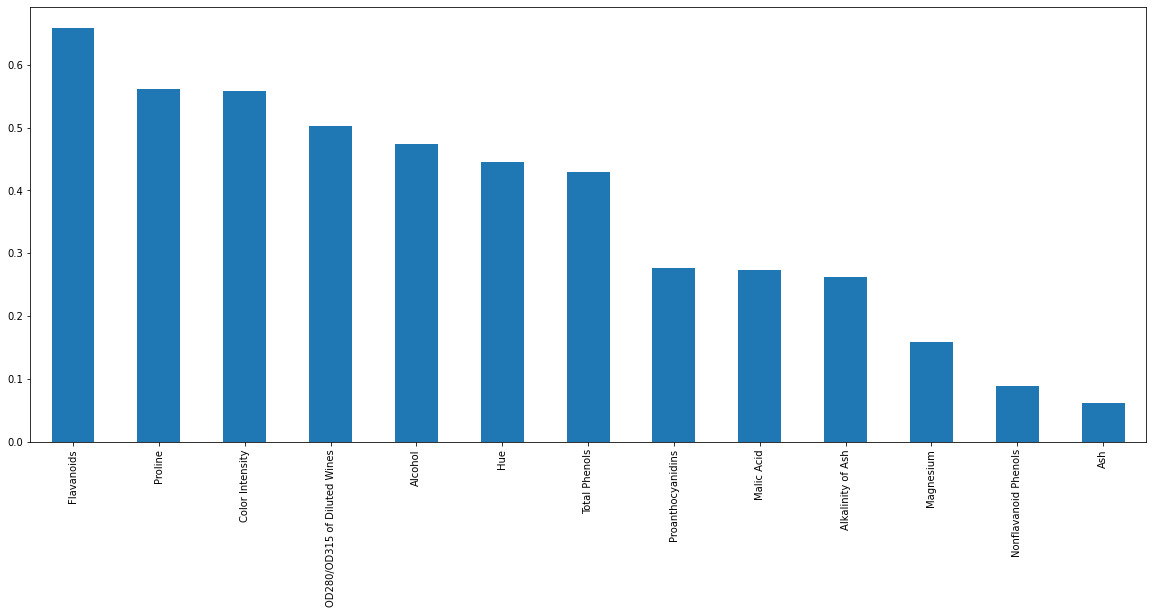

In [ ]:
# Plot the ordered mutual_info values per feature.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

# Select the top-best K=10 features.
sel_K_features = SelectKBest(mutual_info_classif, k=10).fit(X, y)
X.columns[sel_K_features.get_support()]

Index(['Alcohol', 'Malic Acid', 'Alkalinity of Ash', 'Total Phenols',
       'Flavanoids', 'Proanthocyanidins', 'Color Intensity', 'Hue',
       'OD280/OD315 of Diluted Wines', 'Proline'],
      dtype='object')

# **⚛ Mutual Information for Regression.**

*   Estimate mutual information for a continuous target variable.

**Mutual Information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.**

**The function relies on nonparametric methods based on entropy estimation from $k$-nearest neighbors distances. It can also be used for univariate feature selection.**

> [**sklearn.feature_selection.mutual_info_regression**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)


In [ ]:
# Load Dataset.
fb_dataset = pd.read_csv(
    "https://raw.githubusercontent.com/albanda/CE888/master/lab3/dataset_Facebook.csv",
    delimiter=";",
)

# Select only Numeric Features.
numeric_lst = ["int16", "int32", "int64", "float16", "float32", "float64"]
numerical_cols = list(fb_dataset.select_dtypes(include=numeric_lst).columns)
fb_dataset = fb_dataset[numerical_cols]

fb_dataset.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
# Split dataset into features and target variable.
X = fb_dataset.iloc[:, :-1]
y = fb_dataset.iloc[:, -1]

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Determine the mutual information.
mutual_info = mutual_info_regression(X.fillna(0), y)
mutual_info

array([0.1333815 , 0.09723378, 0.11338402, 0.04032447, 0.        ,
       0.        , 0.44602181, 0.46342174, 0.37771501, 0.22150518,
       0.22303296, 0.3084742 , 0.33870151, 0.39418813, 0.34277808,
       2.61666551, 0.91722052])

In [ ]:
# Sort the features based on Importance.
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

like                                                                   2.616666
share                                                                  0.917221
Lifetime Post Total Impressions                                        0.463422
Lifetime Post Total Reach                                              0.446022
Lifetime People who have liked your Page and engaged with your post    0.394188
Lifetime Engaged Users                                                 0.377715
comment                                                                0.342778
Lifetime Post reach by people who like your Page                       0.338702
Lifetime Post Impressions by people who have liked your Page           0.308474
Lifetime Post Consumptions                                             0.223033
Lifetime Post Consumers                                                0.221505
Page total likes                                                       0.133381
Post Month                              

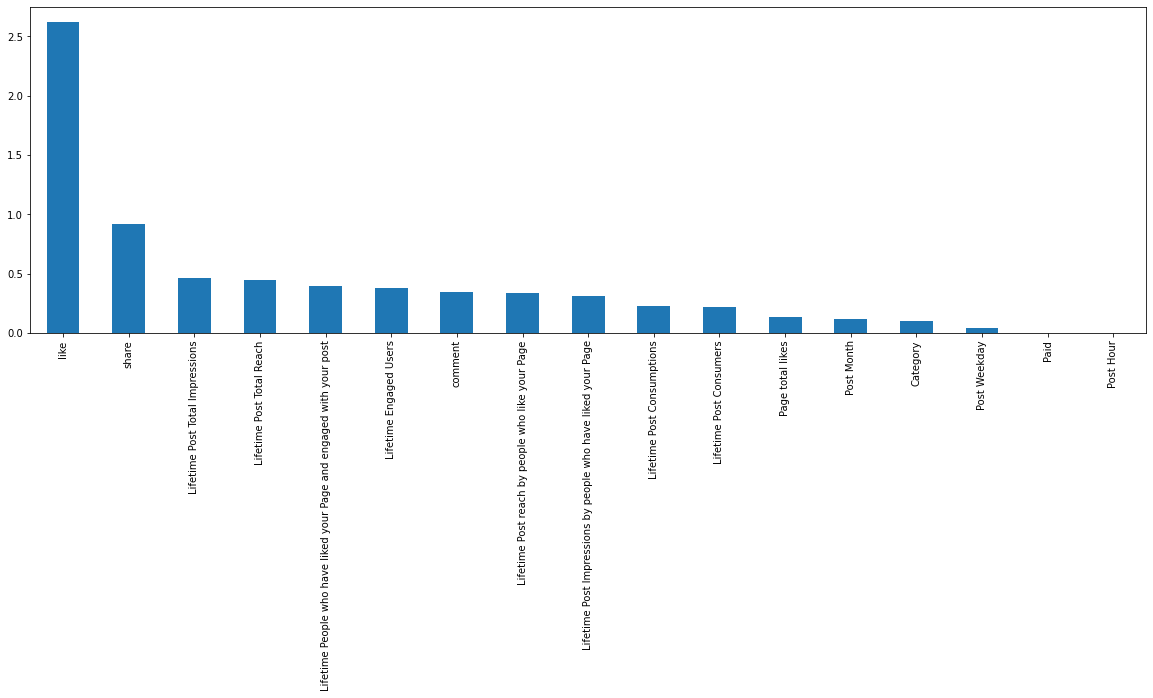

In [ ]:
# Plot the ordered mutual_info values per feature.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 6))

> [**sklearn.feature_selection.SelectPercentile**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)

In [ ]:
from sklearn.feature_selection import SelectPercentile

# Select the top 20 percentile.
sel_top_features = SelectPercentile(mutual_info_regression, percentile=20).fit(X.fillna(0), y)
X.columns[sel_top_features.get_support()]

Index(['Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'like',
       'share'],
      dtype='object')

# **⚛ Chi-Square $\chi^{2}$ Test for Feature Selection.**

`Compute Chi-Squared stats between each non-negative feature and class.`

*  ***This score evaluates categorical features in a classification task.***

Chi-Square is calculated between each feature and the target variable, and select the desired number of features with the best Chi-Square scores. To correctly apply the chi-squared to test the relation between various features in the dataset and the target variable, the following conditions have to be satisfied, i.e., the variables have to be categorical, sampled independently, and values should have an expected frequency greater than 5.

This score can be used to select the `n_features` features with the highest values for the test chi-squared statistic from $X$, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification) relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function "weeds out" the features that are the most likely to be independent of class and therefore irrelevant for classification.

> [**sklearn.feature_selection.chi2**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)


In [ ]:
import pandas as pd

# Load Dataset.
data = pd.read_csv(
    "https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv",
    delimiter=";",
)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Shape of the dataset.
print(data.shape)

(41188, 21)


In [ ]:
# Data Summary.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Encode Categorical Data.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["job"] = le.fit_transform(data["job"])
data["marital"] = le.fit_transform(data["marital"])
data["education"] = le.fit_transform(data["education"])
data["default"] = le.fit_transform(data["default"])
data["housing"] = le.fit_transform(data["housing"])
data["loan"] = le.fit_transform(data["loan"])
data["contact"] = le.fit_transform(data["contact"])
data["month"] = le.fit_transform(data["month"])
data["day_of_week"] = le.fit_transform(data["day_of_week"])
data["poutcome"] = le.fit_transform(data["poutcome"])
data["emp.var.rate"] = le.fit_transform(data["emp.var.rate"])
data["nr.employed"] = le.fit_transform(data["nr.employed"])
data["y"] = le.fit_transform(data["y"])

# Split Dataset into Independent and Dependent Variables.
data = data.astype("int")

X = data[
    [
        "job",
        "marital",
        "education",
        "default",
        "housing",
        "loan",
        "contact",
        "month",
        "day_of_week",
        "poutcome",
        "emp.var.rate",
        "nr.employed",
    ]
]

y = data[["y"]]

**Rank every categorical feature's importance based on the Chi-Square Score.**

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

chi2_features = chi2(X, y)

***Observation:*** **"$poutcome$" is the most important column when compared to the output feature "Yes".**


In [ ]:
p_values = pd.Series(chi2_features[1])
p_values.index = X.columns
p_values.sort_index(ascending=False)

poutcome         3.722828e-23
nr.employed      0.000000e+00
month            1.650559e-01
marital          1.348325e-07
loan             2.077547e-01
job              2.179406e-21
housing          2.566075e-02
emp.var.rate     0.000000e+00
education        2.464796e-38
default          5.521476e-72
day_of_week      1.380665e-03
contact         3.500598e-121
dtype: float64

**Select KBest Categorical Features, based on Chi-Square Score.**

> [**sklearn.feature_selection.SelectKBest**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

In [ ]:
# Select features according to the "K" highest scores.
select_chi2_features = SelectKBest(chi2, k=9)
X_KBest_features = select_chi2_features.fit_transform(X, y)

In [ ]:
print("Original Features Number:", X.shape[1])
print("Reduced Features Number:", X_KBest_features.shape[1])

Original Features Number: 12
Reduced Features Number: 9
